# 수업

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
y = np.array([12, 19, 28, 37, 46])

w = 0       # 기울기
b = 0       # 절편

lrate = 0.001  # 학습률
epochs = 1000  # 반복 횟수

n = float(len(X)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w*X + b  			# 선형 회귀 예측값
    dw = (2/n) * sum(X * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    db = (2/n) * sum(y_pred-y)  	# sum()은 모든 요소들의 합을 계산하는 내장 함수
    w = w - lrate * dw  		# 기울기 수정
    b = b - lrate * db  		# 절편 수정

# 기울기와 절편을 출력한다.
print (w, b)

# 예측값을 만든다.
y_pred = w*X + b

# 입력 데이터를 그래프 상에 찍는다.
plt.scatter(X, y)

# 예측값은 선그래프로 그린다.
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()


In [ ]:
import matplotlib.pylab as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]

reg.fit(X, y)			# 학습

print(reg.predict([[165]]))

# 학습 데이터와 y 값을 산포도로 그린다.
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X)

# 학습 데이터와 예측값으로 선그래프로 그린다.
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다.
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

In [ ]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# 당뇨병 데이터 세트를 적재한다.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X.data.shape )
# 하나의 특징(BMI)만 추려내서 2차원 배열로 만든다. BMI 특징의 인덱스가 2이다.
diabetes_X_new = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_new.data.shape )

# 학습 데이터와 테스트 데이터를 분리한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.1, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# 테스트 데이터로 예측해보자.
y_pred = regr.predict(X_test)

# 실제 데이터와 예측 데이터를 비교해보자.
# plt.plot(y_test, y_pred, '.')

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [ ]:
import pandas as pd

n = 50
x = -2 + 3*np.random.rand(n, 1)
noise = 3*np.random.randn(n, 1)
y = 3 + 4*x + 2*x**2 + 3*x**3 + noise
x = np.array(x.reshape(-1, 1))
y = np.array(y.reshape(-1, 1))
#a = np.vstack([x, y])
dfx = pd.DataFrame(x)
dfy = pd.DataFrame(y)
#print(df)
dfx.to_csv('/content/drive/MyDrive/Colab Notebooks/data1x.csv')
dfy.to_csv('/content/drive/MyDrive/Colab Notebooks/data1y.csv')

plt.figure(figsize = (6, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.grid(alpha = 0.3)
plt.show()

# 과제0406

## 데이터 읽기

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


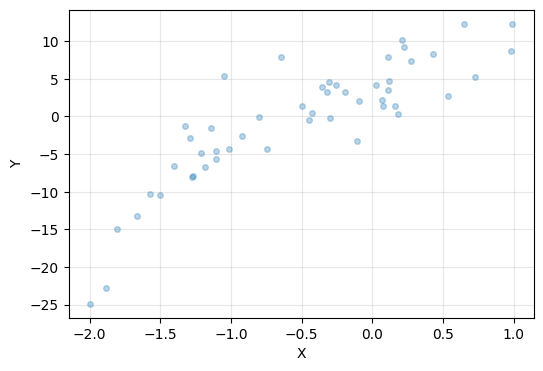

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data0405.csv', usecols=['x','y']).values

x = a[:,0]
x = x.reshape(50,-1)

y = a[:,1]
y = y.reshape(50,-1)

#y = np.array(x[:,1])
#y = np.array(x[:,1].reshape(-1, 1))
plt.figure(figsize = (6, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.grid(alpha = 0.3)
#plt.show()

## 선형모델(최소제곱법)

omega:
 [[3.94188011]
 [8.73592461]]


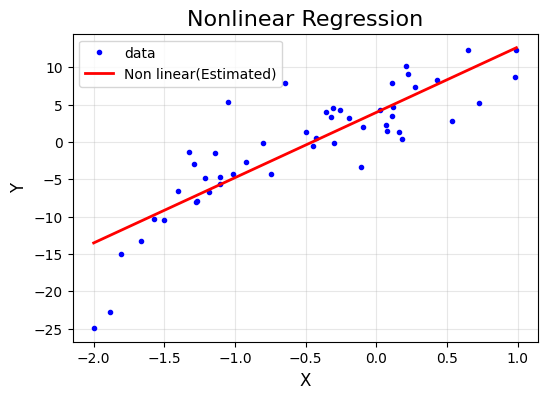

In [ ]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
#yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2
yp = w[0,0] + w[1,0]*xp

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 비선형(2차) 모델

omega:
 [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


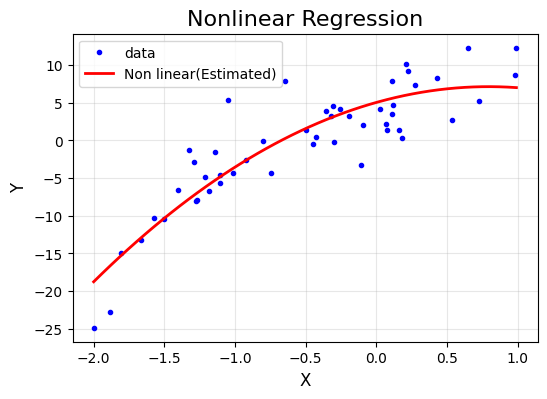

In [ ]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 비선형(4차) 모델

omega:
 [[ 3.63261904]
 [ 5.43470387]
 [ 1.83955091]
 [ 0.76437773]
 [-1.20609535]]


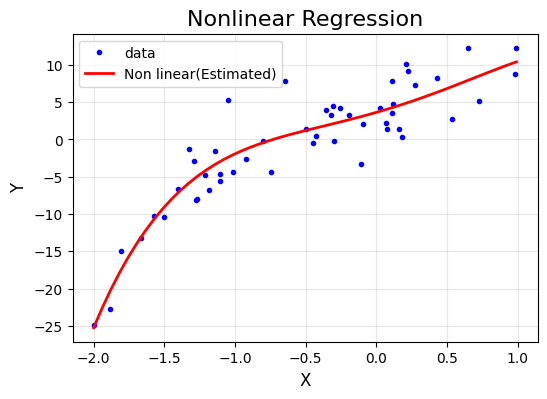

In [ ]:
#A = np.hstack([x**0, x, x**2, x**3])
A = np.hstack([x**0, x, x**2, x**3, x**4])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

xp = np.linspace(np.min(x), np.max(x))
#yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2 + w[3,0]*xp**3 + w[4,0]*xp**4

plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

## 선형모델(경사하강법)

[3.74847981] [0.47054274]


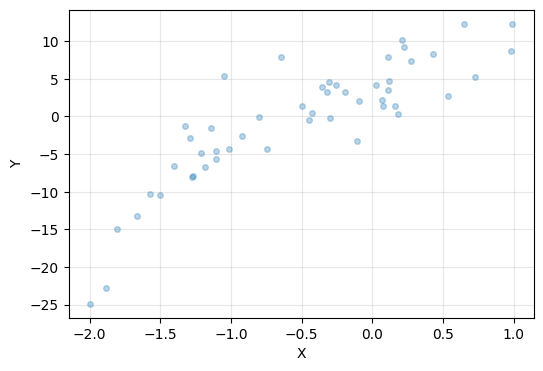

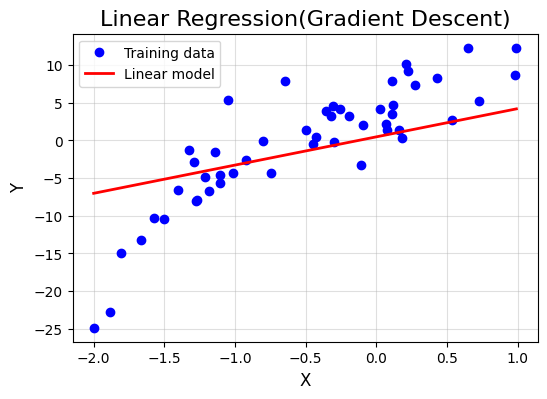

In [ ]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data0405.csv', usecols=['x','y']).values

x = a[:,0]
x = x.reshape(50,-1)

y = a[:,1]
y = y.reshape(50,-1)

plt.figure(figsize = (6, 4))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.grid(alpha = 0.3)

#plt.show()

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 1000  # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(y_pred-y)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           		# 기울기 update
    w0 = w0 - lrate * dw0  		          # 절편 update
print (w1, w0)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.linspace(np.min(x), np.max(x))
y_pred = w1*xp + w0  # 예측값을 만든다.
#print(y_pred)
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
#plt.axis('equal')
plt.grid(alpha = 0.4)
plt.show()

## 비선형(N차) 모델

In [ ]:
d = 5   # d = (n-1)-th degree polynomials

# polynomials basis function matrix build-up
#xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
polybasis = np.hstack([xp**i for i in range(d)])
polybasis = np.asmatrix(polybasis)

# w를 구하는 과정
A = np.hstack([x**i for i in range(d)])
A = np.asmatrix(A)
w = (A.T*A).I*A.T*y  # 학습(최소제곱법)

yp = polybasis*w  # polybasis 함수와 w의 선형 결합

plt.figure(figsize = (6, 8))
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp[:,0], yp[:,0], 'r', linewidth = 2, label = '{}-th degree'.format(d-1))
plt.title('Nonlinear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

ValueError: shapes (1,250) and (5,1) not aligned: 250 (dim 1) != 5 (dim 0)

# Logistic Regression -- 분류(Classification)

## Odds function

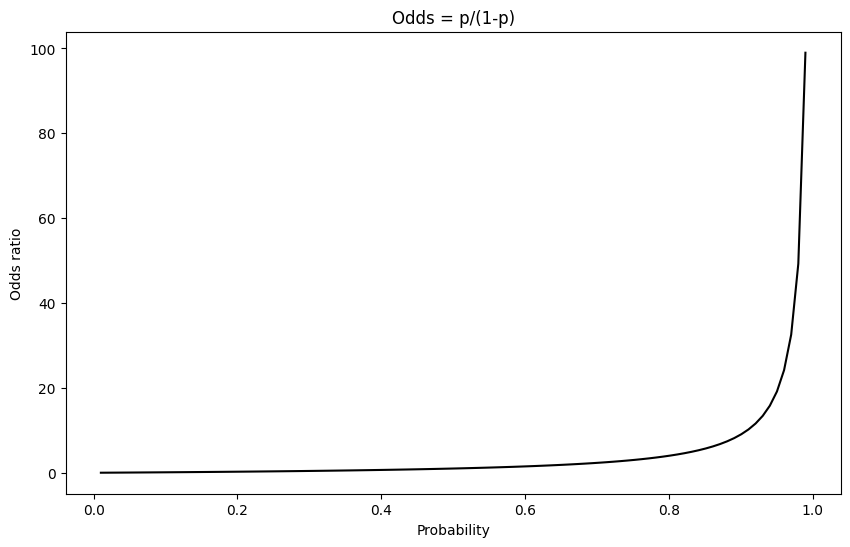

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 100)

# 오즈 함수 정의
odds = p / (1-p)

# 오즈 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(p, odds, color='k')
plt.xlabel('Probability')
plt.ylabel('Odds ratio')
plt.title('Odds = p/(1-p)')
plt.show()

## Logit function

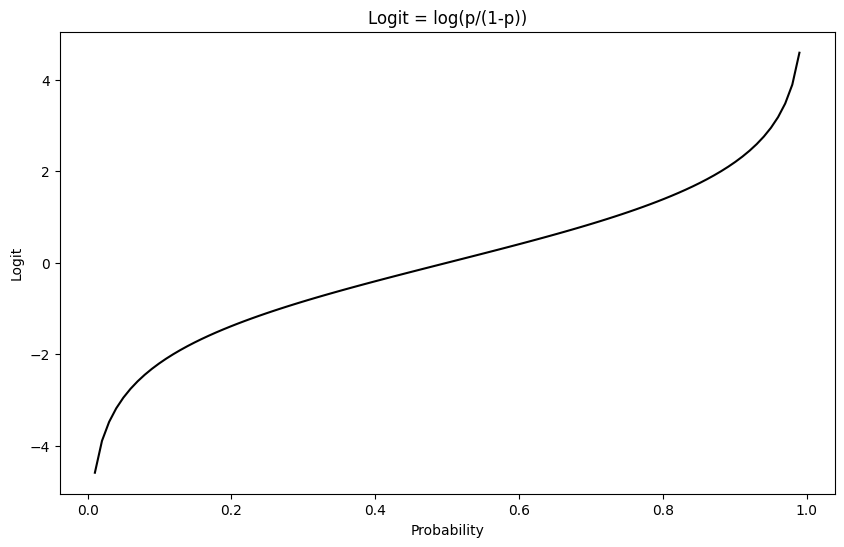

In [ ]:
p = np.linspace(0.01, 0.99, 100)

# 로짓(Logit) 함수 정의
logit = np.log(p / (1 - p))

# 로짓 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(p, logit, color='k')
plt.xlabel('Probability')
plt.ylabel('Logit')
plt.title('Logit = log(p/(1-p))')
plt.show()

##  Sigmoid function

$$ \sigma(z) = \frac{1}{1+e^{-z}} \implies \sigma \left(\omega^T x \right) = \frac{1}{1+e^{-\omega^T x}}$$

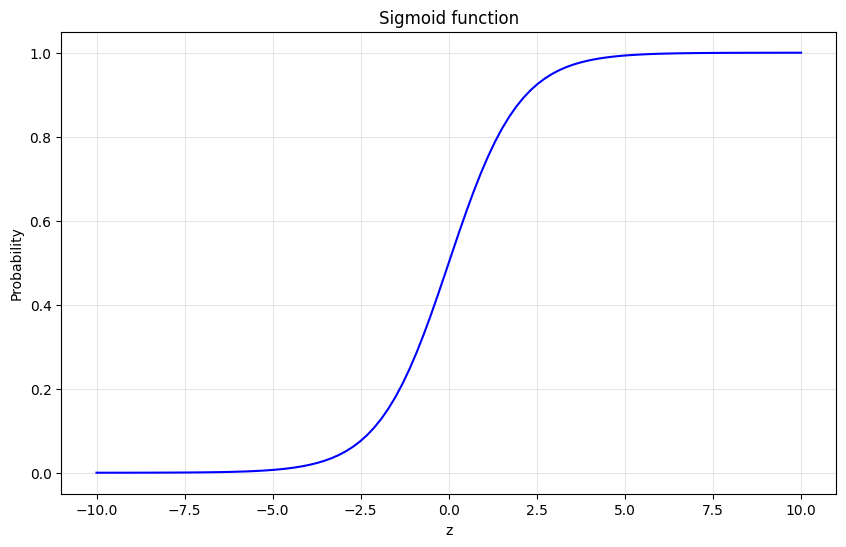

In [ ]:
z = np.linspace(-10, 10, 100)

# 시그모이드 함수 정의
sigmoid = 1 / (1 + np.exp(-z))

# 시그모이드 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, color='b')
plt.xlabel('z')
plt.ylabel('Probability')
plt.title('Sigmoid function')
plt.grid(alpha = 0.3)
plt.show()

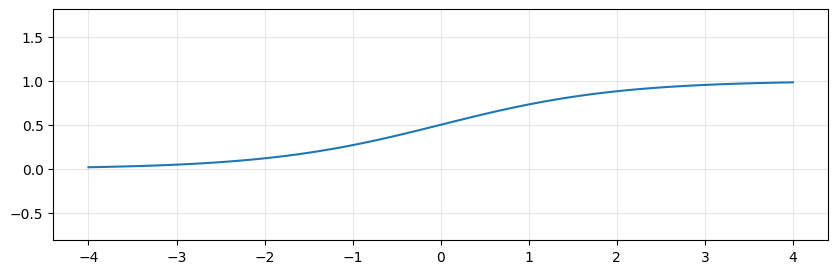

In [ ]:
# Sigmoid function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(-4,4,100)
s = 1/(1 + np.exp(-z))

plt.figure(figsize = (10, 3))
plt.plot(z, s)
plt.xlim([-4, 4])
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

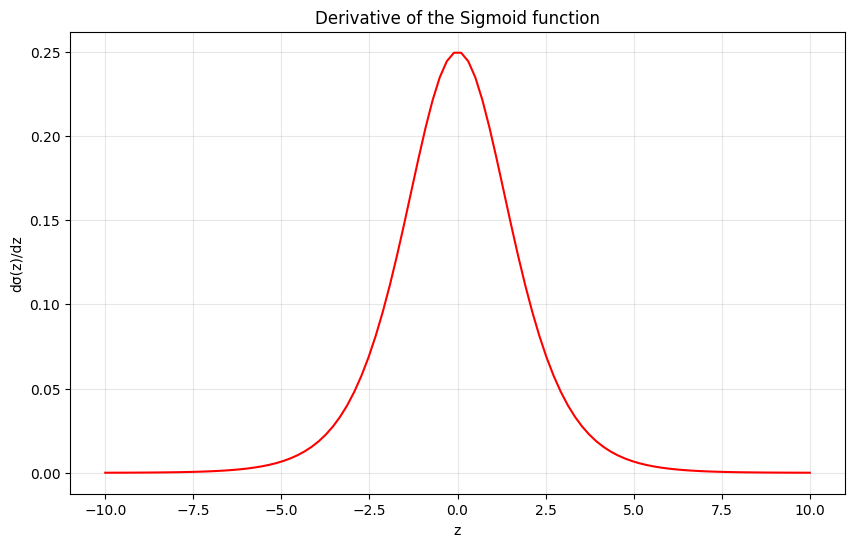

In [ ]:
# 시그모이드 미분 함수 정의
def sigmoid_diff(z):
    sigmoid =  1 / (1 + np.exp(-z))
    return sigmoid * (1 - sigmoid)

z = np.linspace(-10, 10, 100)

# 시그모이드 미분 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid_diff(z), color='r')
plt.xlabel('z')
plt.ylabel('dσ(z)/dz')
plt.title('Derivative of the Sigmoid function')
plt.grid(alpha = 0.3)
plt.show()

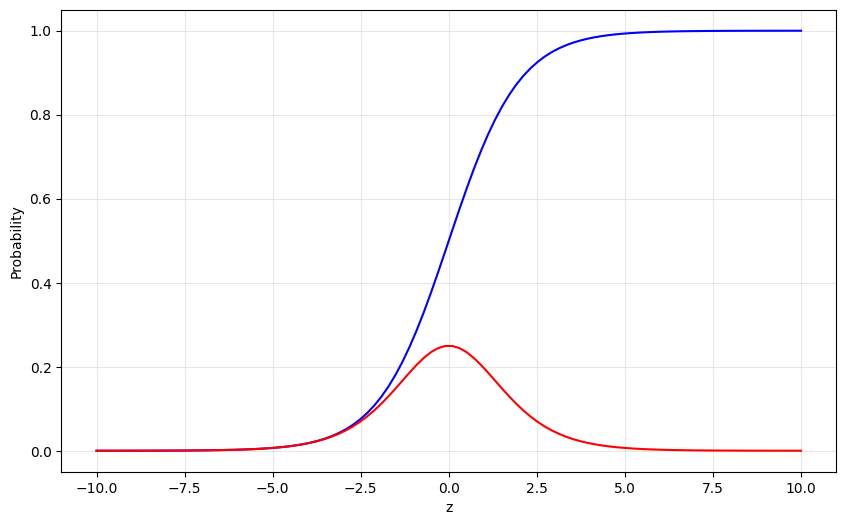

In [ ]:
# 시그모이드 함수와 시그모이드 미분 함수 그래프
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, color='b')
plt.xlabel('z')
plt.ylabel('Probability')
plt.grid(alpha = 0.3)
plt.plot(z, sigmoid_diff(z), color='r')
plt.show()

<br>**예측함수(Hypothesis function)**
$$h_{\omega}(x) = h(x\,;\omega) =  \sigma \left(\omega^T x\right) = \frac{1}{1+e^{-\omega^T x}}$$
<br>

**1개의 학습 데이터 $(x,y)$ 에 대한 확률**
<br>
$$
\begin{align*}
1이\ 나올 \ 확률 :   P\left(y = +1 \mid x\,;\omega\right) &= h_{\omega}(x) = \sigma \left(\omega^T x \right)\\
0이\ 나올 \ 확률 :  P\left(y = 0 \mid x\,;\omega\right) &=  1 - h_{\omega}(x) = 1- \sigma \left(\omega^T x \right)
\end{align*}
$$

<br>

**1이 나올 확률 ($y = 1$)과 0이 나올 확률 ($y = 0$)의 곱의 확률**
<br>

$$P\left(y \mid x\,;\omega\right) = \left(h_{\omega}(x) \right)^y \left(1 - h_{\omega}(x)\right)^{1-y}$$

<br>

**$m$개의 학습 데이터 $(x,y)$ 에 대한 파라미터의 우도함수(likelihood function)**
<br>

$$
\begin{align*}
\mathscr{L}(\omega) &= P\left(y^{(1)}, \cdots, y^{(m)} \mid x^{(1)}, \cdots, x^{(m)}\,;\omega\right)\\
&= \prod\limits_{i=1}^{m}P\left(y^{(i)} \mid x^{(i)}\,;\omega\right)\\
&= \prod\limits_{i=1}^{m}\left(h_{\omega}\left(x^{(i)}\right) \right)^{y^{(i)}} \left(1 - h_{\omega}\left(x^{(i)}\right)\right)^{1-y^{(i)}} \qquad \left(\sim \prod_i \lvert h_i \rvert \right)
\end{align*}
$$

<br>

**로그 우도함수(Log likelihood function)**
<br>

$$\ell(\omega) = \log \mathscr{L}(\omega) = \sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$

<br>

<br>

**교차 엔트로피 오차(Cross Entropy error)**
<br>

$$\ error(\omega) = \ -log \mathscr{L}(\omega) = -\sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$

<br>

**최적의 파라미터**
<br>

$$\hat{\omega} = \arg\max_{\omega} \ell(\omega)$$

<br>

## 학습 데이터 생성

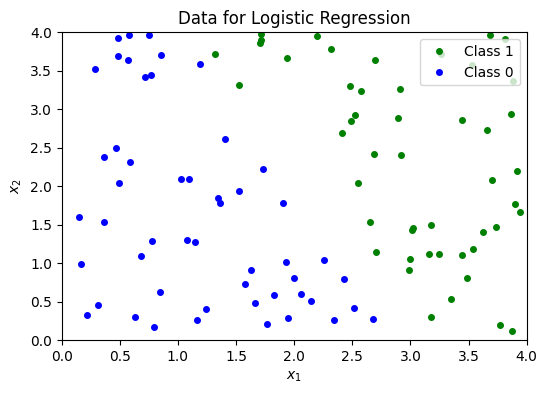

In [ ]:
# 학습 데이터 생성

m = 100
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5    # ([true],...[false]....])

C1 = np.where(y == True)[0]   # y가 true인 인덱스 값을 return
C0 = np.where(y == False)[0]  # y가 false인 인덱스 값을 return

y = np.empty([m,1])
y[C1] = 1   # Class 1
y[C0] = 0   # Class 0

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.title('Data for Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using CVXPY
$$
\begin{align*}
p &= \frac{1}{1+e^{-\omega^T x}} = \frac{e^{\omega^T x}}{e^{\omega^T x} + 1}\\
1-p &= \frac{1}{e^{\omega^T x} + 1}
\end{align*}
$$

<br>

학습 데이터를 재배열
- 데이터 $x_1, \cdots, x_q$  ----->   $y = +1$을 출력
- 데이터 $x_{q+1}, \cdots, x_m$ ----> $y=0$을 출력

<br>
우도함수(The likelihood function)
<br>

$$\mathscr{L} = \prod\limits_{i=1}^{q}{p_i}\prod\limits_{i=q+1}^{m}{(1-p_i)}$$

<br>
로그우도함수(The log likelihood function)

<br>

$$
\begin{align*}
\ell(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*}
$$

<br>

Since $\ell$ is a concave function of $\omega$, the logistic regression problem can be solved as a convex optimization problem

<br>
$$\hat{\omega} = \arg\max_{\omega} \ell(\omega)$$
$$\hat{\omega} = -\arg\min_{\omega} \ell(\omega)$$
<br>

<br>
$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix}, \qquad x = \begin{bmatrix} 1 \\ x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots & \vdots \\\end{bmatrix}, \qquad y = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$
<br><br>
$$
\begin{align*}
\ell(\omega) &= \log \mathscr{L} = \sum\limits_{i=1}^{q}{\log p_i} + \sum\limits_{i=q+1}^{m}{\log(1 - p_i)}  \\ \\
& = \sum\limits_{i=1}^{q}{\log \frac{\exp\left(\omega^T x_i\right)}{1 + \exp \left(\omega^T x_i \right)}} + \sum\limits_{i=q+1}^{m}{\log \frac{1}{1+\exp \left(\omega^T x_i \right)}} \\ \\
 &= \sum\limits_{i=1}^{q}{\left(\omega^T x_i\right)} - \sum\limits_{i=1}^{m}{\log \left(1+\exp \left(\omega^T x_i \right) \right)}
\end{align*} $$
<br>

Refer to [cvxpy functions](http://www.cvxpy.org/en/latest/tutorial/functions/)

- scalar function: `cvx.sum(x)` = $\sum_{ij} x_{ij}$

- elementwise function: `cvx.logistic(x)` = $\log \left(1+e^{x} \right)$

<br>

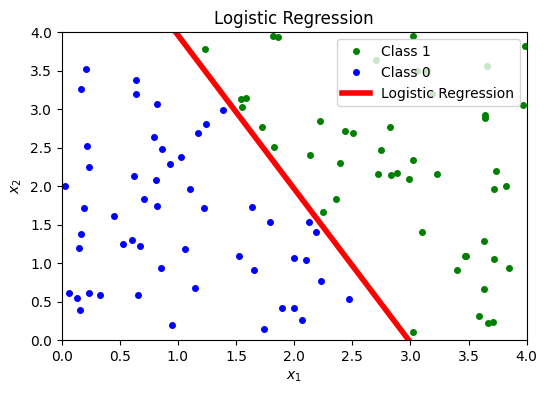

In [ ]:
import cvxpy as cvx

w = cvx.Variable([3, 1])

obj = cvx.Maximize(y.T@X@w - cvx.sum(cvx.logistic(X@w)))
#obj = cvx.Minimize(-y.T@X@w + cvx.sum(cvx.logistic(X@w)))
prob = cvx.Problem(obj).solve()

w = w.value

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using Gradient Descent

<br>

<br>
예측함수(Hypothesis function)
$$h_{\omega}(x) = h(x\,;\omega) =  \sigma \left(\omega^T x\right) = \frac{1}{1+e^{-\omega^T x}}$$
<br>
로그 우도함수(The log likelihood function)

<br>
$$\ell(\omega) = \log \mathscr{L}(\omega) = \sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$


<br>
로그우도함수(The log likelihood function)에 대한 parameters $\omega$ 의 편미분

<br>

$$\frac{\partial \ell(\omega)}{\partial \omega_j} = \nabla \ell(\omega) =
\begin{bmatrix} \frac{\partial \ell(\omega)}{\partial \omega_1} \\ \vdots \\ \frac{\partial \ell(\omega)}{\partial \omega_n}
\end{bmatrix}$$

<br>
한개의 학습데이터에 대한 파라미터 $\omega$ 의 편미분
$$
\begin{align*}
\frac{\partial}{\partial \omega} \left[ y \log (\sigma) + (1-y) \log (1-\sigma)\right] & = y\frac{\sigma'}{\sigma} + (1-y)\frac{-\sigma'}{1-\sigma}\\
& = \left(\frac{y}{\sigma}-\frac{1-y}{1-\sigma} \right)\sigma'\\
& = \frac{y-\sigma}{\sigma (1-\sigma)}\sigma'\\
& = \frac{y-\sigma}{\sigma (1-\sigma)}\sigma (1-\sigma)x\\
& = (y-\sigma)x
\end{align*}
$$

m개의 학습데이터에 대한 파라미터 $\omega$ 의 편미분

<br>

$$\frac{\partial \ell(\omega)}{\partial \omega_j} = \sum_{i=1}^{m} \left(y^{(i)}-h_{\omega} \left(x^{(i)} \right) \right) x_{j}^{(i)} \quad \stackrel{\text{vector 형태}}{=====>} \quad \left(y-h_{\omega}(x)\right)^T x_{j} = x_{j}^T \left(y-h_{\omega}(x)\right) $$

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix}, \qquad x = \begin{bmatrix} 1 \\ x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots & \vdots \\\end{bmatrix}, \qquad y = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

<br>

<br>

$$\nabla \ell(\omega) =
\begin{bmatrix} \frac{\partial \ell(\omega)}{\partial \omega_0} \\ \frac{\partial \ell(\omega)}{\partial \omega_1} \\ \frac{\partial \ell(\omega)}{\partial \omega_2}
\end{bmatrix} = X^T \left(y-h_{\omega}(x)\right) = X^T \left(y-\sigma(X \omega)\right) $$


<br>
경사하강(Gradient Descent) 업데이트 식
$$\omega \leftarrow \omega - \eta \left( - \nabla \ell(\omega)\right)$$

<br>

In [ ]:
# 예측함수(Hypothesis function) 정의
def h(x,w):
    return 1/(1 + np.exp(-x*w))

In [ ]:
w = np.zeros([3,1])

alpha = 0.01

for i in range(10000):
    df = -X.T*(y - h(X,w))
    w = w - alpha*df

print(w)

[[-30.49077184]
 [  9.94432483]
 [  4.97196615]]


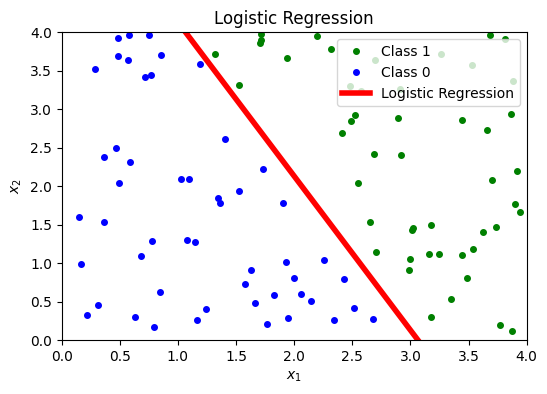

In [ ]:
xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(X[C1,1], X[C1,2], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,1], X[C0,2], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

## Logistic Regression using Scikit-Learn

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix}  \omega_1 \\ \omega_2\end{bmatrix}, \qquad \omega_0, \qquad x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots \\\end{bmatrix}, \qquad y  = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

<br>

In [ ]:
X = X[:, 1:3]

X.shape

(100, 1)

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver = 'lbfgs')
#clf.fit(X, np.ravel(y))
clf.fit(np.asarray(X), np.ravel(y))

LogisticRegression()

In [ ]:
clf.coef_

array([[3.15353607, 1.3839052 ]])

In [ ]:
clf.intercept_

array([-9.07643326])

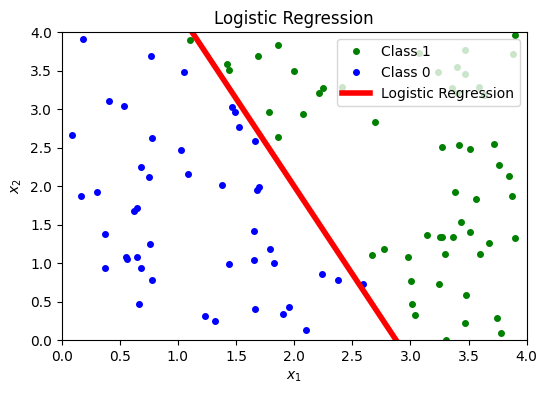

In [ ]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (6, 4))
plt.plot(X[C1,0], X[C1,1], 'go', markersize = 4, label = 'Class 1')
plt.plot(X[C0,0], X[C0,1], 'bo', markersize = 4, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

<br>

##  Non-linear Classification in Logistic Regression

- 커널(Kernels)을 사용해서 nonlinear한 입력 피처 데이터를 linear model로 매핑
<br>

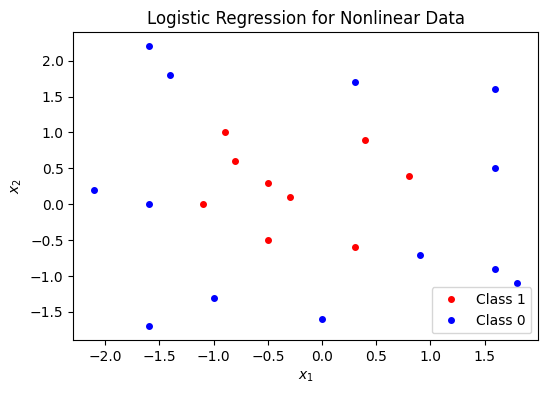

In [ ]:
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])

X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], 'ro', markersize = 4, label = 'Class 1')
plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 4, label = 'Class 0')
plt.title('Logistic Regression for Nonlinear Data')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 4)
plt.show()

<br>

$$
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad \Longrightarrow \quad
z = \phi(x) = \begin{bmatrix} 1\\ \sqrt{2}x_1\\ \sqrt{2}x_2 \\x_1^2 \\ \sqrt{2}x_1 x_2 \\x_2^2 \end{bmatrix}$$

<br>

In [ ]:
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M
Z = np.hstack([np.ones([m,1]), np.sqrt(2)*X[:,0], np.sqrt(2)*X[:,1], np.square(X[:,0]),
               np.sqrt(2)*np.multiply(X[:,0], X[:,1]), np.square(X[:,1])])

w = cvx.Variable([6, 1])
obj = cvx.Minimize(cvx.sum(cvx.logistic(-cvx.multiply(y,Z @ w))))
prob = cvx.Problem(obj).solve()

w = w.value

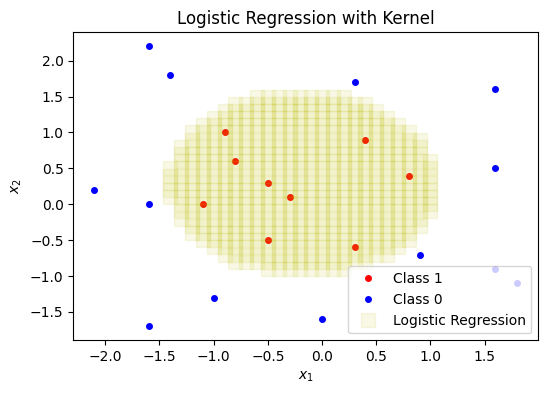

In [ ]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

m = Xp.shape[0]
Zp = np.hstack([np.ones([m,1]), np.sqrt(2)*Xp[:,0], np.sqrt(2)*Xp[:,1], np.square(Xp[:,0]),
                np.sqrt(2)*np.multiply(Xp[:,0], Xp[:,1]), np.square(Xp[:,1])])
q = Zp*w

B = []
for i in range(m):
    if q[i,0] > 0:
        B.append(Xp[i,:])

B = np.vstack(B)

plt.figure(figsize = (6, 4))
plt.plot(X1[:,0], X1[:,1], 'ro', markersize = 4, label = 'Class 1')
plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 4, label = 'Class 0')
plt.plot(B[:,0], B[:,1], 'ys', markersize = 10, alpha = 0.1, label = 'Logistic Regression')
plt.title('Logistic Regression with Kernel')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 4)
plt.show()

<br>

## Cross-Entropy (Optional)

You might have seen the concept of **entropy** in physics. In fact, the concept of entropy is closely related to the **cross-entropy** that we just encountered in logistic regression.

<br>

**Entropy in Physics**

In statistical physics, entropy measures the uncertainty or disorder of a system:

<br>

$$
S = -k_B \sum_{i} p_i \log p_i,
$$

where:
- $ S $ is the [Boltzmann entropy](https://en.wikipedia.org/wiki/Boltzmann%27s_entropy_formula).
- $ k_B $ is Boltzmann's constant.
- $ p_i $ is the probability of the system being in state $ i $.

<br>

Entropy quantifies how much "randomness" or "information" is needed to describe the system's configuration.

<br>



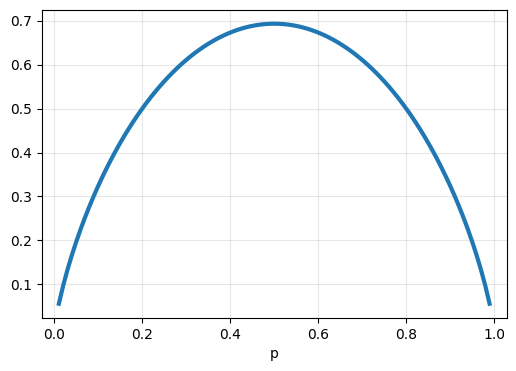

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

p = np.linspace(0.01, 0.99, 100)
S = -p*np.log(p) - (1-p)*np.log(1-p)

plt.figure(figsize = (6, 4))
plt.plot(p, S, linewidth = 3)
plt.xlabel('p')
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

<br>

**Cross-Entropy in Logistic Regression**

In logistic regression, cross-entropy measures how well the predicted probability distribution matches the true distribution:

<br>

$$
\mathcal{L} = - \sum_{i} y_i \log \hat{y}_i,
$$

where:
- $ y_i $ is the true label (1 or 0).
- $ \hat{y}_i $ is the predicted probability for class 1.
- The loss is high when the model predicts probabilities far from the true class.

<br>

**Connecting the Concepts**

- In physics, Boltzmann entropy measures the disorder of a system based on probabilities of different states.
- In machine learning, cross-entropy loss measures the "disorder" or "uncertainty" when the predicted probabilities do not align with the true labels.
- Enhancing classification performance is positively correlated with reducing data disorder or uncertainty.

<br>

<br><br>

# <실습> DIGIT(MNIST) 데이터 분류

- 손글씨로 쓴 0, 1 데이터의 Feature를 추출(Extracting)하는 전처리(Preprocesssing)를 거쳐 Logistic Regression으로 분류하는 실습


<br>
<center>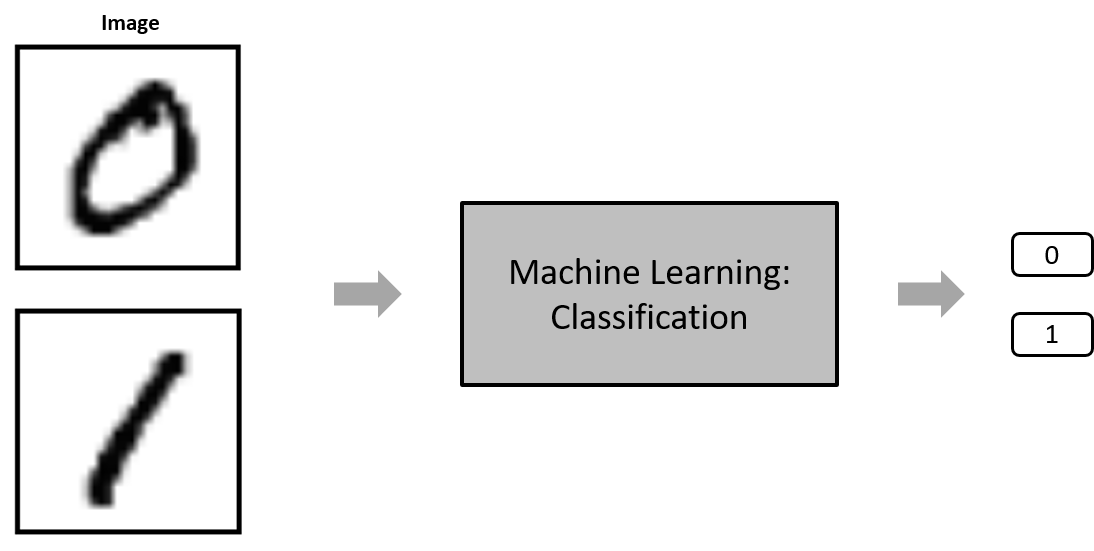</center>
<br>



__Step 1. Load the data__

<br>

|Data | Data dexcription |
|---|---|
|0|1000 images (28×28 pixels) of handwritten digit 0 |
|1|1000 images (28×28 pixels) of handwritten digit 1 |

<br>


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

from six.moves import cPickle  # for data loading

data = cPickle.load(open('/content/drive/MyDrive/Machine Learning실습/binary_data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']


In [16]:
data1.shape

(1000, 28, 28)

In [ ]:
data1[0].shape

(28, 28)

In [ ]:
data0.shape

(1000, 28, 28)

In [ ]:
data0[0].shape

(28, 28)

In [ ]:
data0[0]
# data1[0]*1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

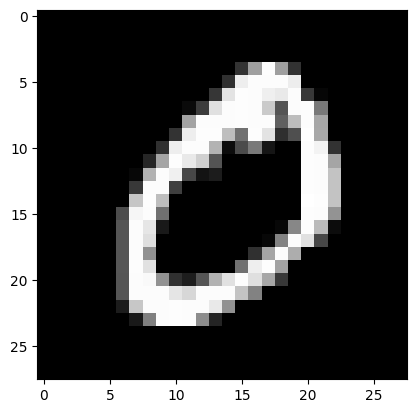

In [ ]:
plt.imshow(data0[0], 'gray')

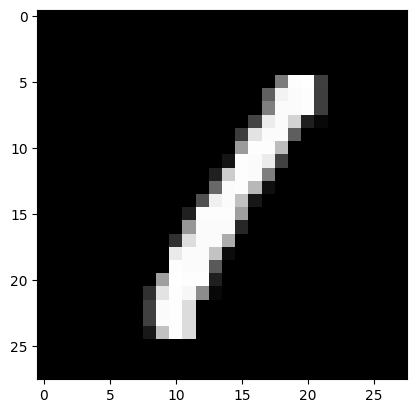

In [ ]:
plt.imshow(data1[0], 'gray')

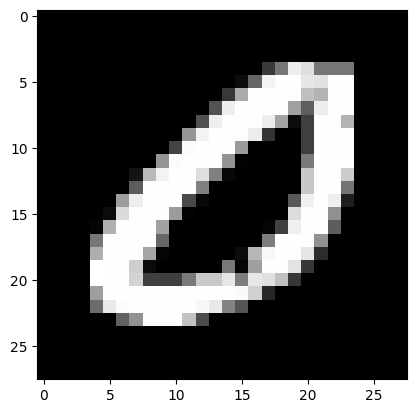

In [ ]:
plt.imshow(data0[np.random.randint(100)], 'gray') # 1~100 사이의 data0 (0 값)을 가져옴

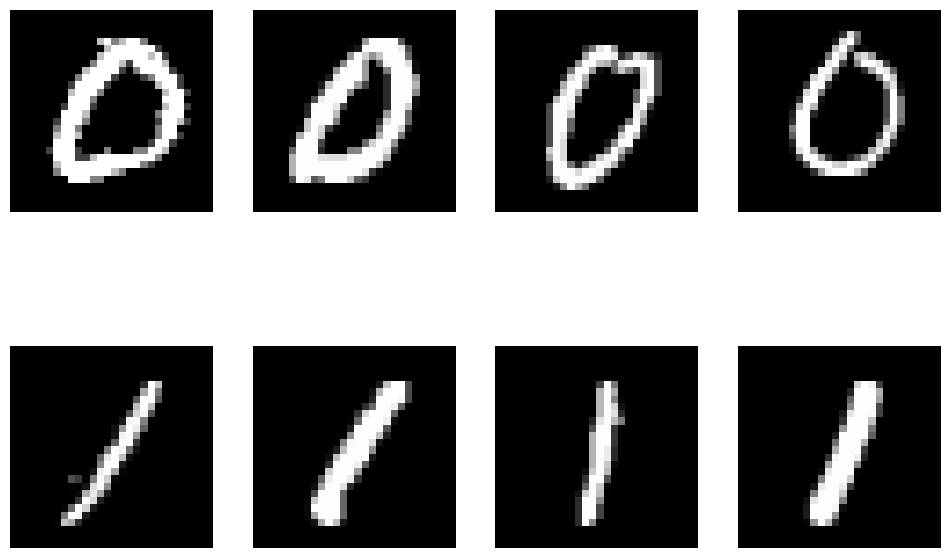

In [ ]:
plt.figure(figsize = (12, 8))
# plt.subplot(2,4,1)
# plt.imshow(data0[np.random.randint(1000)], 'gray')
# plt.axis('off')

plt.subplot(2,4,1), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,2), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,3), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,4), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,5), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,6), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,7), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.subplot(2,4,8), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.show()

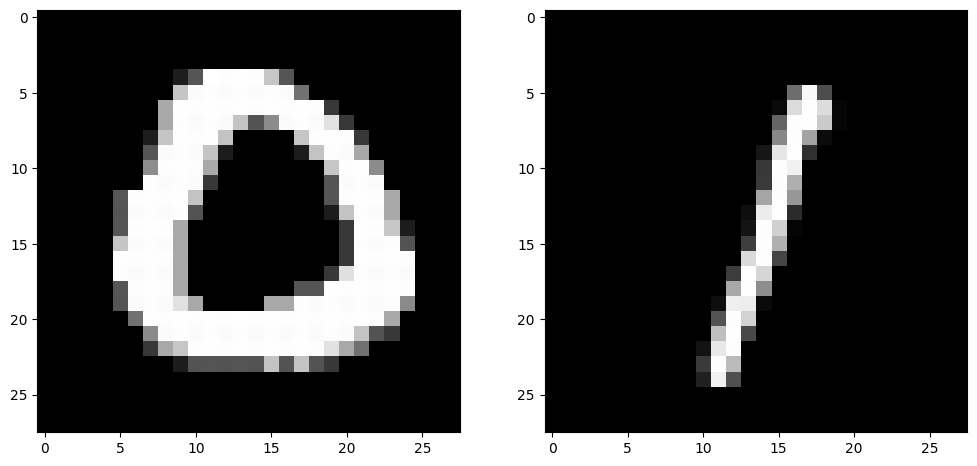

In [ ]:
plt.figure(figsize = (12, 8))
# plt.subplot(2,4,1)
# plt.imshow(data0[np.random.randint(1000)], 'gray')
# plt.axis('off')
plt.subplot(1,2,1), plt.imshow(data0[np.random.randint(1000)], 'gray')
plt.subplot(1,2,2), plt.imshow(data1[np.random.randint(1000)], 'gray')
#plt.subplot(1,2,1), plt.imshow(data0[np.random.randint(1000)], 'gray'), plt.axis('off')
#plt.subplot(1,2,2), plt.imshow(data1[np.random.randint(1000)], 'gray'), plt.axis('off')
plt.show()

<br>

**Step 2. Extract features**
<br>
   Choose informative, discriminating and independent features from raw data (or input)
<br>

$$\phi(x) = \begin{bmatrix} \ \text{feature1}\\ \text{feature2} \end{bmatrix} $$

- Feature 1 : the total average pixels over the entire image
<br>

In [ ]:
np.mean(data0[0])

39.661989795918366

In [ ]:
np.mean(data0, axis=(1,2)).shape

(1000,)

In [ ]:
np.mean(data0, axis=(1,2)).reshape(-1,1).shape

(1000, 1)

In [ ]:
np.mean(data1[0])

21.855867346938776

In [ ]:
np.mean(data1, axis=(1,2)).reshape(-1,1).shape

(1000, 1)


- Feature 2 : the total average pixels located at the center of the image --> (img[12:16,12:16])
<br>

In [ ]:
np.mean(data0[0][12:16, 12:16])

2.9375

In [ ]:
X0 = np.hstack([np.mean(data0[:,12:16, 12:16], axis=(1,2)).reshape(-1,1),
                np.mean(data0, axis=(1,2)).reshape(-1,1)])

In [ ]:
X0.shape

(1000, 2)

In [ ]:
np.mean(data1[0][12:16, 12:16])

173.75

In [ ]:
X1 = np.hstack([np.mean(data1[:,12:16, 12:16], axis=(1,2)).reshape(-1,1),
                np.mean(data1, axis=(1,2)).reshape(-1,1)])

In [ ]:
X1.shape

(1000, 2)

- Include the ones as the bias term.
<br>
$$\phi(x) = \begin{bmatrix} 1 \\ \text{feature1}\\ \text{feature2} \end{bmatrix} \quad \implies \quad X \; (\text{or } \Phi) = \begin{bmatrix} \phi_1^T\\ \vdots \\ \phi_{1000}^T \\ \phi_{1001}^T \\ \vdots \\ \phi_{2000}^T \end{bmatrix}$$
<br>
You should end up with a $2000\times3$ input matrix with the first $1000$ rows correspond to all of the `data0` and the second 1000 rows correspond to all of the given `data1`. This matrix is matrix $X$ (or $\Phi$) which we learned in a class.
<br>

In [ ]:
X = np.vstack([X1, X0])
X.shape

(2000, 2)

In [ ]:
Y = np.vstack([np.ones([1000,1]), np.zeros([1000,1])])
Y.shape

(2000, 1)

<br>

__Step 3. Plot the features of data__

<br>

- Plot the features to see if classes are separable. The expected plot is the following:

<br>

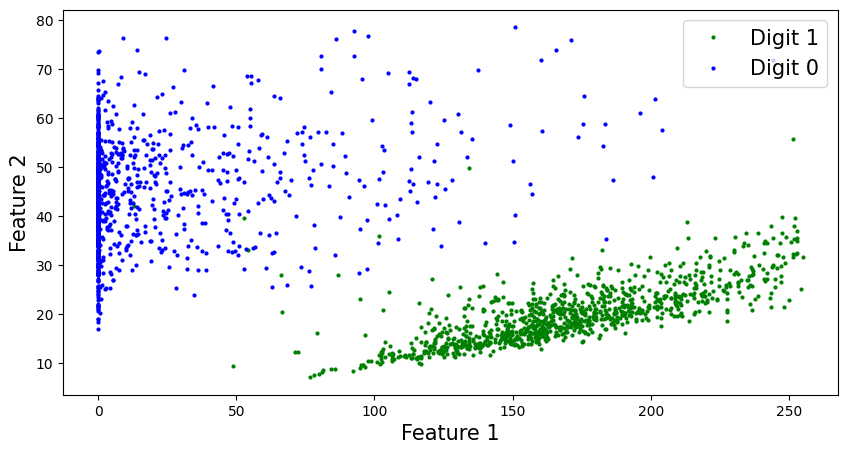

In [ ]:
plt.figure(figsize = (10, 5))

plt.plot(X1[:,0], X1[:,1], 'go', markersize = 2, label='Digit 1')
plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 2, label='Digit 0')
plt.legend(fontsize = 15)
plt.xlabel(r'Feature 1', fontsize = 15)
plt.ylabel(r'Feature 2', fontsize = 15)
plt.show()

<br>

__Step 4. Logistic Regression 학습__

<br>

In [ ]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(X, np.ravel(Y))

LogisticRegression()

In [ ]:
clf.coef_

array([[ 0.05480823, -0.31100703]])

In [ ]:
clf.intercept_

array([3.53572089])

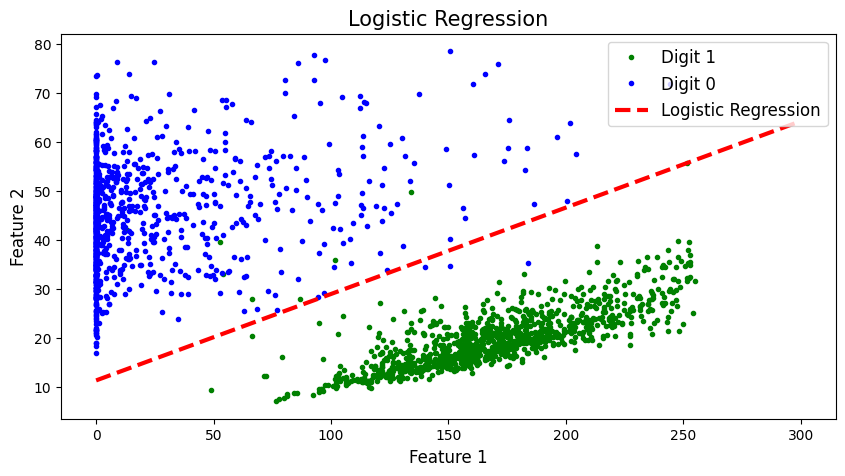

In [ ]:
w = np.zeros([3,1])
w[0,0] = clf.intercept_[0]
w[1,0] = clf.coef_[0,0]
w[2,0] = clf.coef_[0,1]

xp = np.linspace(0,300,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10, 5))

plt.plot(X1[:,0], X1[:,1], 'go', markersize = 3, label='Digit 1')
plt.plot(X0[:,0], X0[:,1], 'bo', markersize = 3, label='Digit 0')
plt.plot(xp, yp, 'r--', linewidth = 3, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.legend(fontsize = 12)
plt.xlabel(r'Feature 1', fontsize = 12)
plt.ylabel(r'Feature 2', fontsize = 12)
plt.show()


<br>

__Step 5. New data prediction__

<br>

In [ ]:
test_x = data0[0]
feature_x =  np.hstack([np.mean(test_x[12:16, 12:16]), np.mean(test_x)]).reshape(1,-1)
feature_x.shape

(1, 2)

In [ ]:
result = clf.predict(feature_x)
print(result)

[0.]


<br>

# Problem : Multiclass classification with logistic regression</font>

<br>

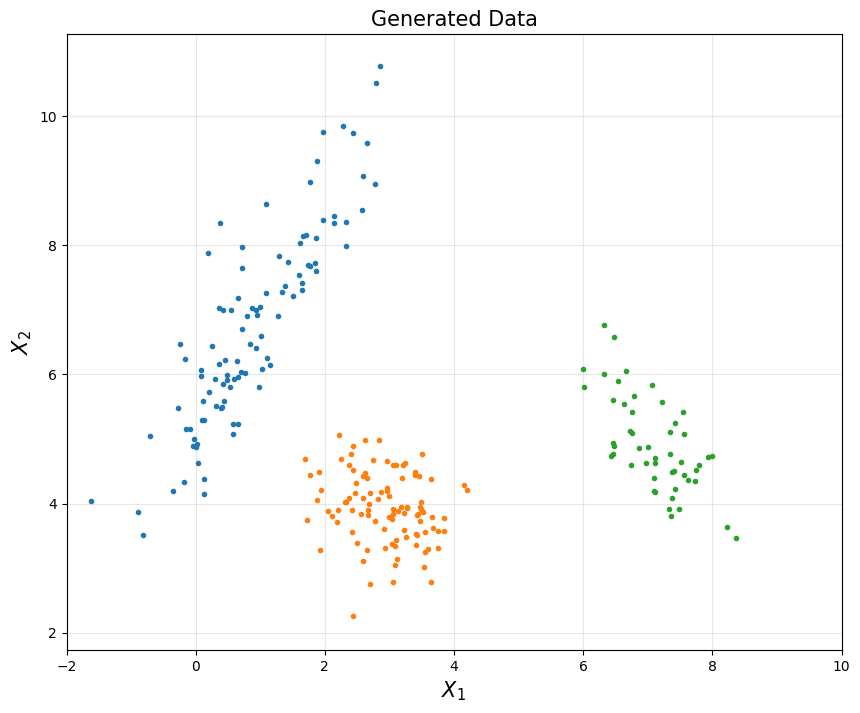

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate three simulated clusters

mu1 = np.array([1, 7])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)

mu2 = np.array([3, 4])
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]])
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)

mu3 = np.array([7, 5])
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]])
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50)

plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 1, 12])
plt.show()